In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image, ImageOps


import glob
import PIL

from sklearn.model_selection import train_test_split


In [2]:

civs_path = 'BikeTest'


In [3]:

path  = civs_path

paths = glob.glob(path + "/*.jpg") # Grabbing all the image file names

n_images = len(paths)

rand_idxs = np.random.permutation(n_images)

paths_subset = np.random.choice(paths, n_images , replace=False) 
all_paths    = paths_subset[rand_idxs]

print(n_images)


52


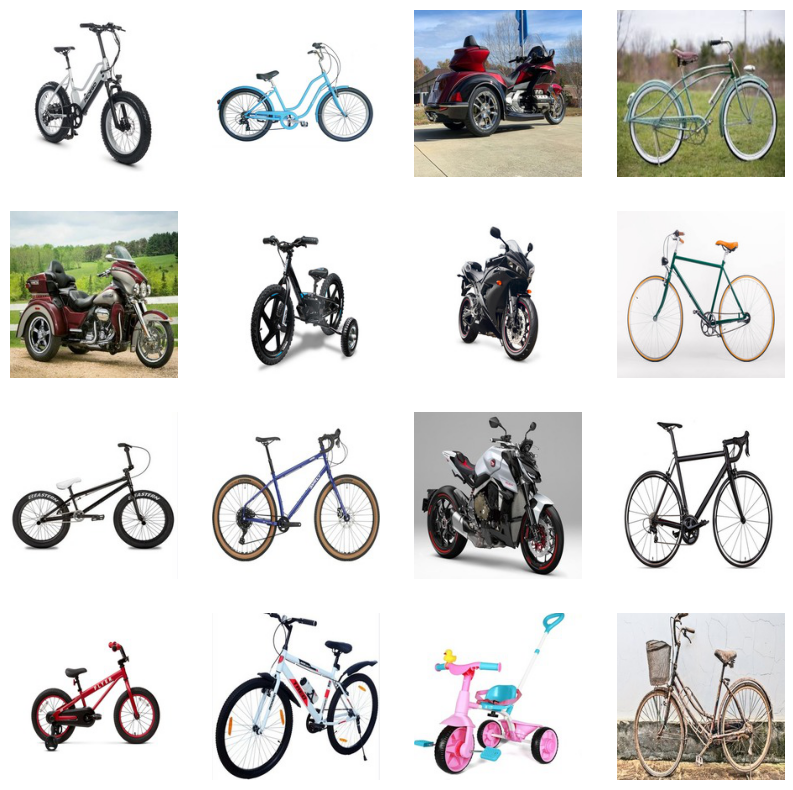

In [4]:

_, axes = plt.subplots(4, 4, figsize=(10, 10))

for ax, img_path in zip(axes.flatten(), all_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")


In [5]:
def label_func2(fname):
    ##print(fname)
    fname = fname.replace('BikeTest\\',"")
    ##print(fname)
    temp_name = fname.replace(".jpg", "").split("_")
    ##print(temp_name)
    
    ##y0 = temp_name[0]                             
    y1 = float(temp_name[0].replace("WH", ""))     
    y2 = float(temp_name[1].replace("SRT", ""))    
    y3 = float(temp_name[2].replace("SP", ""))     
    y4 = float(temp_name[3].replace("MD", ""))   
    y5 = float(temp_name[4].replace("SZ", ""))     

    return [fname, y1, y2, y3, y4, y5]


In [6]:

list_imgs = []
list_label_vectors = []

for img_name in all_paths:
    ##print(img_name)
    
    my_img = Image.open(img_name)
    
    my_img = my_img.resize((39, 140))

    my_img = ImageOps.grayscale(my_img)

    img_np = np.array(my_img)
    
    ## data = np.array(my_img)
    ## print(data)
    ## input()

    ## img_np = img_np.reshape(-1)
    
    temp_label_vector_rc = label_func2(img_name)
    ## if temp_label_vector_rc[1] == "tg":
    
        ## print(img_np.shape)
    list_imgs.append(img_np)

    list_label_vectors.append( temp_label_vector_rc )


In [7]:

X =  list_imgs
y =  list_label_vectors 


In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#######################################################

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


41
11
41
11


In [9]:

X_train[0]


array([[255, 255, 255, ..., 255, 255, 254],
       [255, 255, 255, ..., 255, 255, 254],
       [255, 255, 255, ..., 255, 255, 254],
       ...,
       [255, 255, 255, ..., 255, 255, 254],
       [255, 255, 255, ..., 255, 255, 254],
       [255, 255, 255, ..., 255, 255, 254]], dtype=uint8)

In [10]:

list_ids_train      = []
list_features_train = []
list_imgs_train     = []


for index in range(len(X_train)):
    
    # image target (label)
    reg_vals = y_train[index]
    target = np.zeros( (5) )
    
    target[ 0 ] = reg_vals[1]
    target[ 1 ] = reg_vals[2]
    target[ 2 ] = reg_vals[3]
    target[ 3 ] = reg_vals[4]
    target[ 4 ] = reg_vals[5]
   ## target[ 5 ] = reg_vals[7]
   ## target[ 6 ] = reg_vals[8]
   ## target[ 7 ] = reg_vals[9]
   ## target[ 8 ] = reg_vals[10]
   ## target[ 9 ] = reg_vals[11]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_train[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0
    

        
    list_ids_train.append(          reg_vals[0]                )
    list_imgs_train.append(        single_np_img               )
    list_features_train.append(    target      )
    
    print(list_features_train)

[array([0.5, 0.6, 0.7, 1. , 1. ])]
[array([0.5, 0.6, 0.7, 1. , 1. ]), array([0.75, 0.  , 0.  , 0.  , 1.  ])]
[array([0.5, 0.6, 0.7, 1. , 1. ]), array([0.75, 0.  , 0.  , 0.  , 1.  ]), array([0.5, 1. , 0.9, 0.9, 1. ])]
[array([0.5, 0.6, 0.7, 1. , 1. ]), array([0.75, 0.  , 0.  , 0.  , 1.  ]), array([0.5, 1. , 0.9, 0.9, 1. ]), array([0.5, 0.7, 0.6, 0.3, 1. ])]
[array([0.5, 0.6, 0.7, 1. , 1. ]), array([0.75, 0.  , 0.  , 0.  , 1.  ]), array([0.5, 1. , 0.9, 0.9, 1. ]), array([0.5, 0.7, 0.6, 0.3, 1. ]), array([0.75, 0.8 , 0.78, 0.89, 1.  ])]
[array([0.5, 0.6, 0.7, 1. , 1. ]), array([0.75, 0.  , 0.  , 0.  , 1.  ]), array([0.5, 1. , 0.9, 0.9, 1. ]), array([0.5, 0.7, 0.6, 0.3, 1. ]), array([0.75, 0.8 , 0.78, 0.89, 1.  ]), array([0.5, 0.6, 0.5, 1. , 1. ])]
[array([0.5, 0.6, 0.7, 1. , 1. ]), array([0.75, 0.  , 0.  , 0.  , 1.  ]), array([0.5, 1. , 0.9, 0.9, 1. ]), array([0.5, 0.7, 0.6, 0.3, 1. ]), array([0.75, 0.8 , 0.78, 0.89, 1.  ]), array([0.5, 0.6, 0.5, 1. , 1. ]), array([0.5 , 0.8 , 0.73, 0.8 ,

In [11]:

list_imgs_train[0]


array([[255, 255, 255, ..., 255, 255, 254],
       [255, 255, 255, ..., 255, 255, 254],
       [255, 255, 255, ..., 255, 255, 254],
       ...,
       [255, 255, 255, ..., 255, 255, 254],
       [255, 255, 255, ..., 255, 255, 254],
       [255, 255, 255, ..., 255, 255, 254]], dtype=uint8)

In [12]:

list_ids_test      = []
list_features_test = []
list_imgs_test     = []


for index in range(len(X_test)):
    
    # image target (label)
    reg_vals = y_test[index]
    target = np.zeros( (5) )
    
    target[ 0 ] = reg_vals[1]
    target[ 1 ] = reg_vals[2]
    target[ 2 ] = reg_vals[3]
    target[ 3 ] = reg_vals[4]
    target[ 4 ] = reg_vals[5]
   ## target[ 5 ] = reg_vals[7]
   ## target[ 6 ] = reg_vals[8]
   ## target[ 7 ] = reg_vals[9]
   ## target[ 8 ] = reg_vals[10]
   ## target[ 9 ] = reg_vals[11]

    # image data, normalised from 0-255 to 0-1
    single_np_img = X_test[index]
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ) / 255.0
    ## image_values = torch.FloatTensor(  single_np_img.astype(float)  ).permute(2,0,1).view(1,3,280,80) / 255.0
        
    list_ids_test.append(          reg_vals[0]                )
    list_imgs_test.append(        single_np_img               )
    list_features_test.append(    target      )


In [13]:

conditions_matrix_train = np.array( list_features_train )
conditions_matrix_test  = np.array( list_features_test )


In [14]:

print( conditions_matrix_train.shape )
print( conditions_matrix_test.shape  )


(41, 5)
(11, 5)



## Save data for deployment


In [15]:

DF_conditions_train = pd.DataFrame(conditions_matrix_train)
DF_conditions_train.to_csv("PD_conditions_train.csv")


In [16]:

DF_ids_train = pd.DataFrame(list_ids_train)
DF_ids_train.to_csv("PD_ids_train.csv")


In [17]:

list_imgs_train[15]


array([[ 97, 100, 100, ...,  81,  81,  77],
       [ 97, 101, 101, ...,  84,  81,  78],
       [ 96,  99, 101, ...,  82,  80,  79],
       ...,
       [174, 177, 176, ..., 169, 161, 167],
       [167, 174, 179, ..., 181, 170, 174],
       [168, 174, 175, ..., 183, 179, 184]], dtype=uint8)

In [18]:

list_imgs_train[17].shape


(140, 39)

In [19]:

list_imgs_train_stretched = [     the_img_np.reshape(-1)         for the_img_np in list_imgs_train ]


In [20]:

list_imgs_train_stretched[0]


array([255, 255, 255, ..., 255, 255, 254], dtype=uint8)

In [21]:

list_imgs_train_stretched[7].shape


(5460,)

In [22]:

list_imgs_train_stretched[4][:1000]


array([209, 212, 215, 216, 217, 219, 222, 224, 225, 226, 226, 227, 227,
       229, 227, 224, 222, 224, 226, 224, 219, 219, 220, 218, 210, 211,
       211, 209, 206, 202, 196, 195, 196, 196, 196, 197, 200, 197, 189,
       210, 211, 214, 214, 217, 219, 221, 222, 225, 226, 226, 226, 227,
       229, 228, 226, 224, 225, 226, 225, 221, 221, 220, 220, 212, 209,
       210, 210, 207, 203, 198, 197, 196, 195, 195, 197, 202, 199, 191,
       209, 211, 213, 213, 217, 219, 222, 222, 225, 225, 225, 225, 227,
       228, 228, 227, 225, 226, 226, 226, 225, 223, 220, 218, 212, 207,
       208, 209, 209, 204, 199, 197, 194, 194, 194, 196, 202, 201, 196,
       208, 211, 212, 212, 216, 219, 220, 221, 224, 224, 224, 225, 227,
       228, 227, 229, 227, 226, 227, 228, 228, 226, 221, 220, 215, 209,
       209, 213, 215, 208, 201, 203, 201, 198, 200, 201, 202, 202, 200,
       209, 210, 212, 213, 216, 219, 218, 218, 220, 222, 223, 226, 226,
       228, 228, 229, 227, 227, 228, 228, 228, 227, 226, 224, 22

In [23]:

list_imgs_train_stretched[7].shape


(5460,)


## Keeps scale at 0..255


In [24]:

np_list_imgs_train_stretched = np.array( list_imgs_train_stretched )  


In [25]:

np_list_imgs_train_stretched.shape


(41, 5460)

In [26]:

np_list_imgs_train_stretched[3]


array([254, 254, 254, ..., 255, 255, 255], dtype=uint8)

In [27]:

DF_imgs_np_train = pd.DataFrame(np_list_imgs_train_stretched)


In [28]:

DF_imgs_np_train


,0,1,2,3,4,5,6,7,8,9,...,5450,5451,5452,5453,5454,5455,5456,5457,5458,5459
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,254
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,254,254,254,255,254,254,255,255,254,254,...,254,255,255,255,255,255,255,255,255,255
4,209,212,215,216,217,219,222,224,225,226,...,192,192,199,198,185,181,181,179,179,168
5,255,255,255,255,255,255,255,255,255,255,...,255,255,255,254,254,254,255,255,255,255
6,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
7,230,232,234,237,238,239,240,240,240,240,...,245,244,242,240,241,238,237,235,234,230
8,242,242,242,242,242,242,242,242,231,242,...,242,242,242,242,242,242,242,242,242,242
9,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [29]:

DF_imgs_np_train.to_csv("PD_imgs_np_train.csv")



## Follow Web tool logic


In [30]:


url1 = "PD_ids_train.csv"
pd_ids_train = pd.read_csv(url1)
pd_ids_train_np = pd_ids_train.to_numpy()
pd_ids_train_np = pd_ids_train_np[1:, 1:]


In [31]:

url2 = "PD_conditions_train.csv"
pd_conditions_train = pd.read_csv(url2)
pd_conditions_train_np = pd_conditions_train.to_numpy()
pd_conditions_train_np   = pd_conditions_train_np[1:, 1:]


In [32]:


url3 = "PD_imgs_np_train.csv"
pd_imgs_np_train = pd.read_csv(url3)
pd_imgs_np_train_np = pd_imgs_np_train.to_numpy()
pd_imgs_np_train_np      = pd_imgs_np_train_np[1:, 1:]




## KNN part


In [33]:

def euclidean_distance(v1, v2):
    return np.sqrt( np.sum(   (v1 - v2)**2   )   )



In [34]:

def predict(test_x):
    
    ## calculate distances between test_x and all dta samples in x
    ## this distances vector is a vector of 45 distances
    ## distances = [ euclidean_distance(test_x , x)  for x in X_train    ]

    distances = [ euclidean_distance(test_x, x )  for x in pd_conditions_train_np  ]
      
    
    ## distances - > [23, 3, 145, 17, ...]
    
    k = 3
    
    ## sort by distance value and return the k nearest neighbors
    ## np.argsort returns the indices of the k neares neighbors
    k_neighbor_indices = np.argsort(distances)[:k]
    print(k_neighbor_indices)
    
    
    ## with indices, extract labels from y_train 
    selected_imgs_to_avg = [ pd_imgs_np_train_np[i].reshape((140, 39))  for i in k_neighbor_indices  ]
    

    return selected_imgs_to_avg


In [35]:

np.set_printoptions(suppress=True)
print( conditions_matrix_test[:10, :] )


[[0.5  0.   0.21 0.01 1.  ]
 [0.5  0.15 0.23 0.22 1.  ]
 [0.5  0.8  0.7  1.   1.  ]
 [1.   0.23 0.15 0.6  0.  ]
 [0.75 0.   0.   0.8  0.  ]
 [1.   0.85 0.44 0.77 0.  ]
 [0.5  0.26 0.44 0.36 1.  ]
 [0.5  0.   0.13 0.4  0.  ]
 [0.5  0.1  0.6  0.55 1.  ]
 [0.75 0.4  0.05 0.6  0.  ]]


In [36]:

def generate_img_per_index(index):
    
    selected_imgs_to_avg = predict( conditions_matrix_test[  index  ] )
    the_test_conditions = conditions_matrix_test[  index  ]
    
    
    avg_gen_img = np.mean( np.array(selected_imgs_to_avg), axis=0 )
    avg_gen_img = avg_gen_img.astype(int)
    gen_pil_image = avg_gen_img
    
    real_my_img = np.array(list_imgs_test[index])
    real_pil_image = Image.fromarray(real_my_img)
    real_pil_image = ImageOps.grayscale(real_pil_image)
    
    print(gen_pil_image)
    print(real_pil_image)
    
    return the_test_conditions, gen_pil_image, real_pil_image


[34 22 37]
[[255 255 255 ... 254 254 255]
 [255 255 255 ... 255 254 254]
 [255 255 255 ... 255 254 254]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
<PIL.Image.Image image mode=L size=39x140 at 0x257247CE290>


Text(0.5, 1.0, 'real')

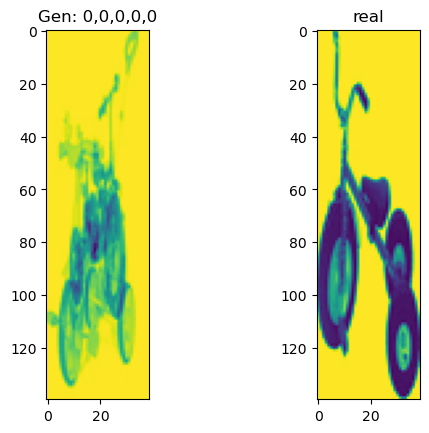

In [41]:

the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(4)


the_test_conditions = the_test_conditions.astype(int)
str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
str_conditions = str_conditions.replace(" ","")
str_conditions = str_conditions.replace("[","")
str_conditions = str_conditions.replace("]","")

## print(str_conditions)
                 

fig, ax = plt.subplots(1,2)

ax[0].imshow(gen_pil_image)
ax[1].imshow(real_pil_image)

ax[0].set_title("Gen: " + str_conditions)
ax[1].set_title("real")


[27 32  9]
[[224 226 227 ... 220 219 213]
 [220 221 224 ... 218 215 212]
 [220 222 224 ... 216 217 213]
 ...
 [196 200 204 ... 181 190 191]
 [203 198 192 ... 185 190 195]
 [189 168 177 ... 190 187 193]]
<PIL.Image.Image image mode=L size=39x140 at 0x25721CA4790>
[ 6 32 27]
[[222 224 226 ... 220 215 204]
 [217 220 223 ... 218 211 203]
 [217 220 223 ... 216 214 205]
 ...
 [213 218 220 ... 215 213 217]
 [215 218 218 ... 221 221 220]
 [211 207 213 ... 224 220 223]]
<PIL.Image.Image image mode=L size=39x140 at 0x257248A8450>
[ 8 16 20]
[[255 254 255 ... 255 255 254]
 [255 254 255 ... 255 254 254]
 [255 255 255 ... 254 255 254]
 ...
 [200 198 201 ... 198 203 202]
 [199 198 199 ... 200 201 202]
 [198 197 199 ... 200 201 203]]
<PIL.Image.Image image mode=L size=39x140 at 0x25724894A10>
[34 22 37]
[[255 255 255 ... 254 254 255]
 [255 255 255 ... 255 254 254]
 [255 255 255 ... 255 254 254]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
<PIL.Ima

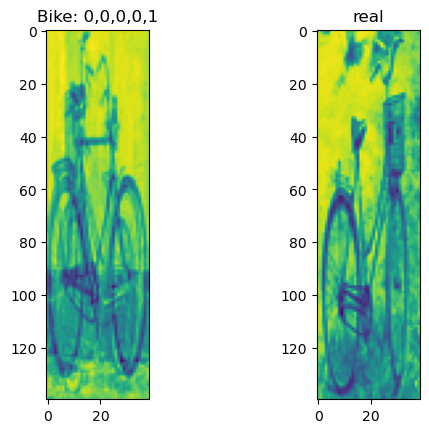

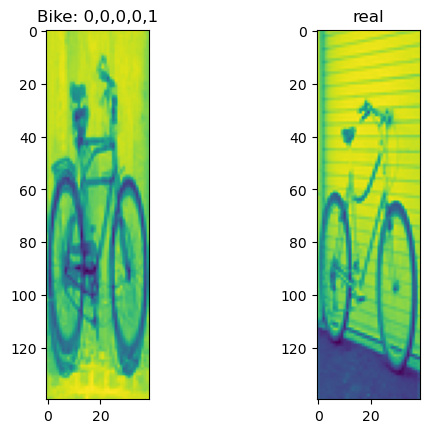

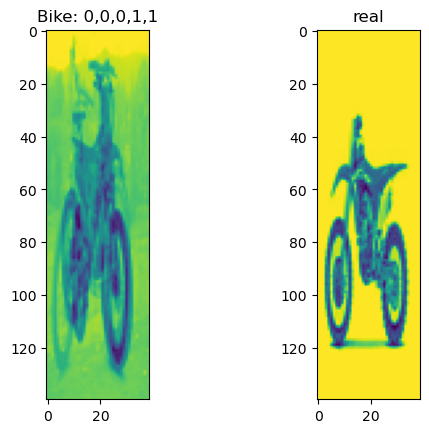

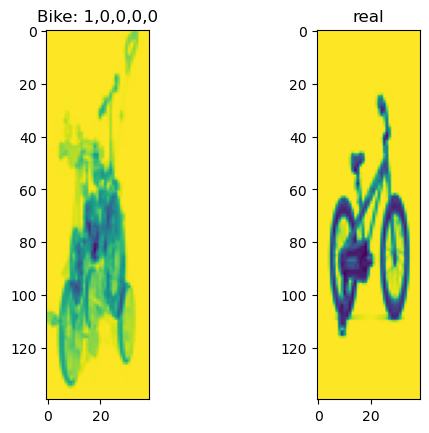

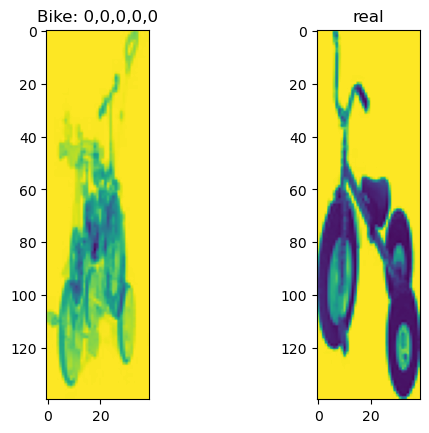

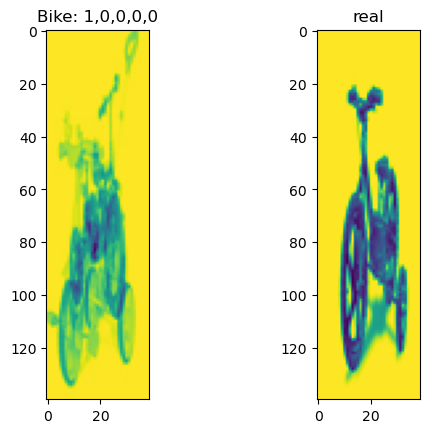

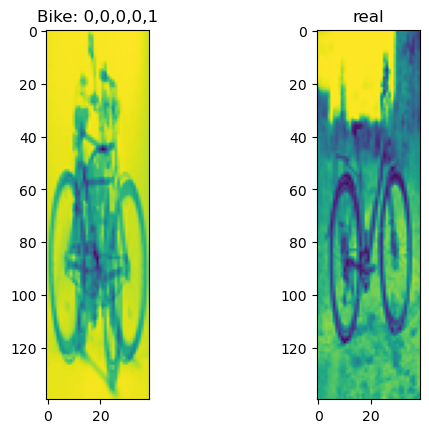

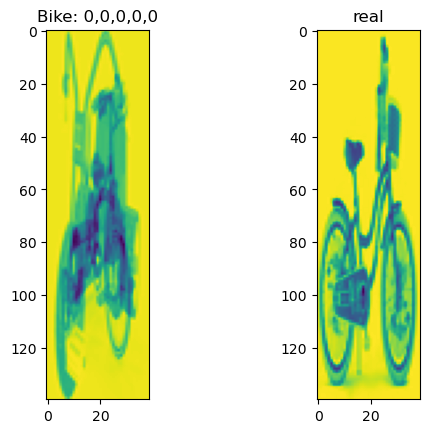

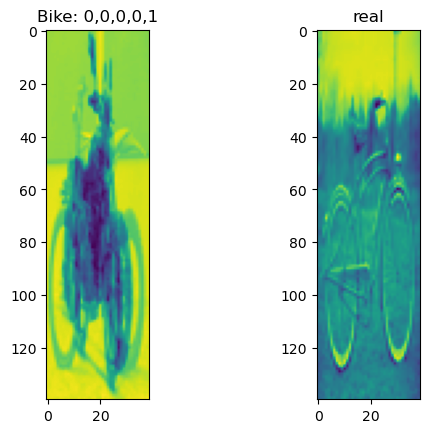

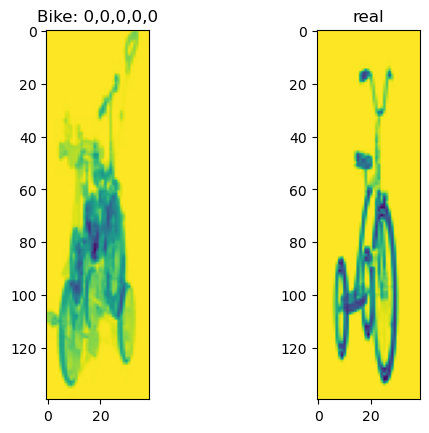

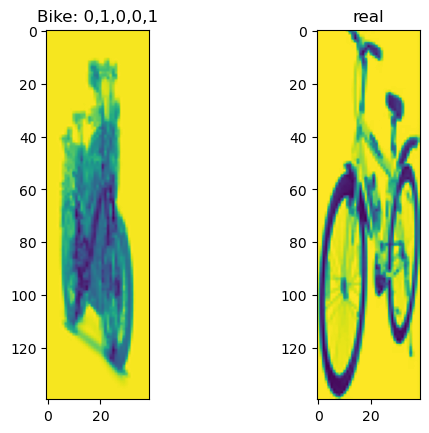

In [42]:

for test_i in range( conditions_matrix_test.shape[0]  ):


    the_test_conditions, gen_pil_image, real_pil_image = generate_img_per_index(test_i)
    
    the_test_conditions = the_test_conditions.astype(int)
    str_conditions = np.array2string(the_test_conditions, precision=0, separator=',', suppress_small=True)
    str_conditions = str_conditions.replace(" ","")
    str_conditions = str_conditions.replace("[","")
    str_conditions = str_conditions.replace("]","")

    ## print(str_conditions)

    fig, ax = plt.subplots(1,2)
    ax[0].imshow(gen_pil_image)
    ax[1].imshow(real_pil_image)
    
    ax[0].set_title("Bike: " + str_conditions)
    ax[1].set_title("real")
